In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
data=pd.read_csv("../input/california-housing-prices/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data.dropna(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


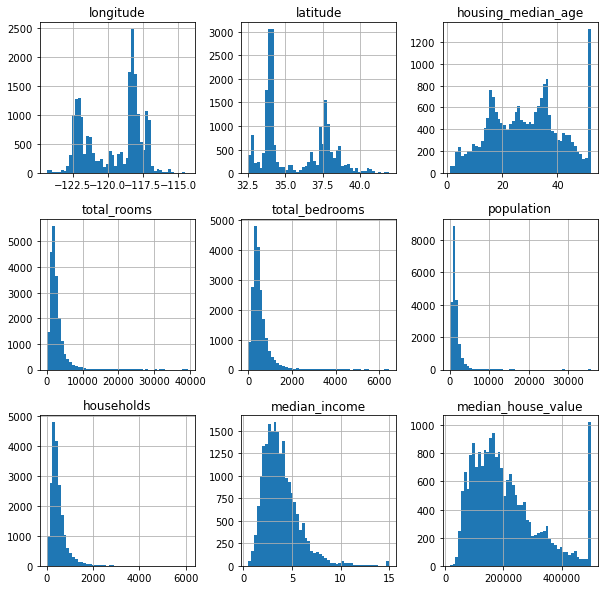

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
data.hist(figsize=(10,10),bins=50)
plt.show()

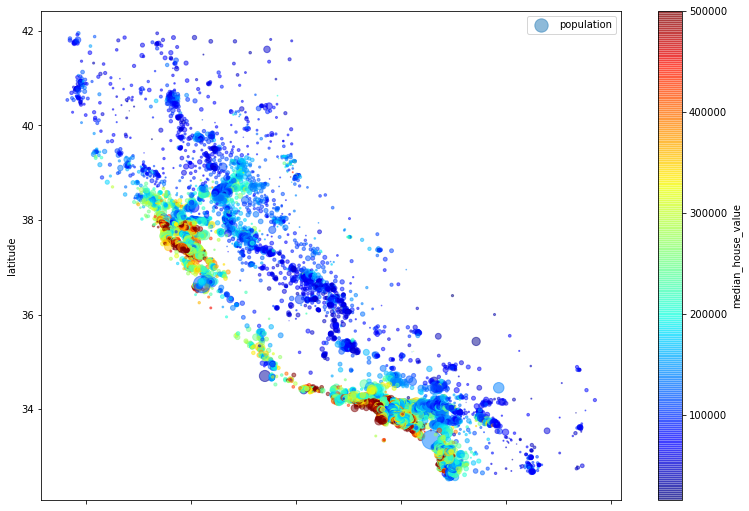

In [14]:
#Visualizing the median house value on heatmap 
data.plot(kind='scatter', x="longitude", y="latitude", figsize=(13,9), alpha=0.5,
         s=data["population"]/100, label="population", c="median_house_value",
         cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend(loc="best")
plt.show()


In [15]:
#CREATING NEW ATRRIBUTES
data["rooms_per_households"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]


In [16]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_households,bedrooms_per_room,population_per_household
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,0.213039,3.071533
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,0.057983,10.438269
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,0.175427,2.429032
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,0.203162,2.817582
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,0.239821,3.281513
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


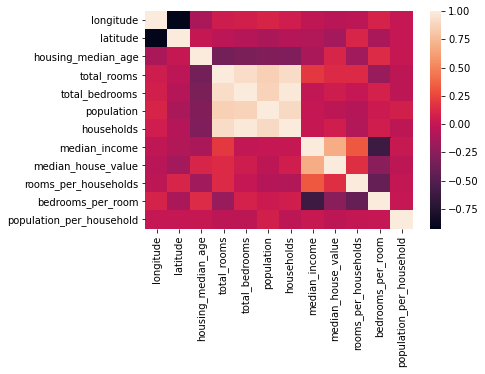

In [17]:
sns.heatmap(data.corr())

In [18]:
data.drop(['households','total_bedrooms','population','total_rooms'], axis = 1, inplace = True)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20433 non-null  float64
 1   latitude                  20433 non-null  float64
 2   housing_median_age        20433 non-null  float64
 3   median_income             20433 non-null  float64
 4   median_house_value        20433 non-null  float64
 5   ocean_proximity           20433 non-null  object 
 6   rooms_per_households      20433 non-null  float64
 7   bedrooms_per_room         20433 non-null  float64
 8   population_per_household  20433 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.6+ MB


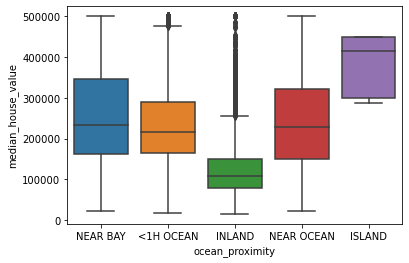

In [24]:
sns.boxplot(x='ocean_proximity',y='median_house_value',data = data)

In [25]:
dummy = pd.get_dummies(data["ocean_proximity"], prefix='Ocean_').iloc[:,:-1]
data = pd.concat([data,dummy], axis=1)
data = data.drop("ocean_proximity", axis=1)
data.shape

(20433, 12)

In [26]:
data.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,rooms_per_households,bedrooms_per_room,population_per_household,Ocean__<1H OCEAN,Ocean__INLAND,Ocean__ISLAND,Ocean__NEAR BAY
0,-122.23,37.88,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,0,1
1,-122.22,37.86,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,0,1
2,-122.24,37.85,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,0,1
3,-122.25,37.85,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,0,0,0,1
4,-122.25,37.85,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,0,0,0,1


In [33]:
y=data['median_house_value']
X=data.drop('median_house_value',axis=1)

In [27]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)

In [35]:
lr=LinearRegression()
lr.fit(Xtrain, ytrain)

LinearRegression()

In [36]:
print('Training R2')
print(lr.score(Xtrain, ytrain))
print('Testing R2')
print(lr.score(Xtest, ytest))

Training R2
0.6272377588906561
Testing R2
0.5969610068226308


In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
polyXtrain=poly.fit_transform(Xtrain)
polyXtest=poly.fit_transform(Xtest)
lr2 = LinearRegression()
lr2.fit(polyXtrain,ytrain)
print("Training R2")
print(lr2.score(polyXtrain,ytrain))
print("Testing R2")
print(lr2.score(polyXtest,ytest))

Training R2
0.7084975831565593
Testing R2
-24.950673060559605


In [44]:
polyXtrain.shape

(16346, 78)

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtmodel = DecisionTreeRegressor(max_depth=11, random_state=10)
dtmodel.fit(Xtrain,ytrain)
print("Training R2")
print(dtmodel.score(Xtrain,ytrain))
print("Testing R2")
print(dtmodel.score(Xtest,ytest))


Training R2
0.8715875739584604
Testing R2
0.7246192555883972


In [59]:
from sklearn.model_selection import cross_val_score
scoresdt= cross_val_score(dtmodel, Xtrain, ytrain, cv=10, scoring='r2')
print(scoresdt)

[0.74011628 0.70924603 0.69599528 0.69969748 0.70342168 0.67946873
 0.75084216 0.71098197 0.70150243 0.7072925 ]


In [60]:
print(np.mean(scoresdt))
print(np.var(scoresdt))

0.7098564536427346
0.00039336441244890066


In [40]:
dtmodel.feature_importances_

array([5.59198997e-02, 5.13466250e-02, 3.55546493e-02, 5.34622141e-01,
       2.18230451e-02, 1.69895584e-02, 1.23830557e-01, 9.18940765e-04,
       1.58720963e-01, 0.00000000e+00, 2.73622002e-04])

In [48]:
from xgboost import XGBRegressor

In [51]:
X = data.drop('median_house_value',axis=1)
y= data['median_house_value']
X.rename(columns={'Ocean__<1H OCEAN':'Ocean__1H OCEAN'},inplace = True)

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)

In [53]:
XGBmodel = XGBRegressor(n_estimators = 100,random_state=10)
XGBmodel.fit(Xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
print("Training R2")
print(XGBmodel.score(Xtrain,ytrain))
print("Testing R2")
print(XGBmodel.score(Xtest,ytest))

Training R2
0.938250917564553
Testing R2
0.8451156081762565


In [55]:
from sklearn.model_selection import cross_val_score
scoresxgb= cross_val_score(XGBmodel, Xtrain, ytrain, cv=10, scoring='r2')
print(scoresxgb)

[0.84420288 0.82359357 0.82256055 0.84290808 0.83530074 0.83233637
 0.85395145 0.84192847 0.82566637 0.83941351]


In [56]:
print(np.mean(scoresxgb))
print(np.var(scoresxgb))

0.8361861988404229
9.389490061083242e-05


Comparing Decision tree and XGB models performances

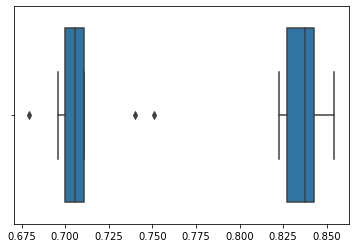

In [61]:
sns.boxplot(scoresxgb)
sns.boxplot(scoresdt)

XGB model gives better r2 value but the variance of model r2 is more with XGB
Decision tree model r2 is low but the variance of DT model r2 value is less.